# Logistic Regression

In [1]:
import os
os.chdir(r'E:\SmartCube\End to End Code')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('Python_Credit_Risk_XTrain.csv')

In [4]:
df_test = pd.read_csv('Python_Module_Day_15.4_Credit_Risk_Validate_data_XTEST.csv')

In [5]:
Missing Treatment
Outlier Treatment
Feature Scaling 
Encoding

SyntaxError: invalid syntax (3159737235.py, line 1)

In [5]:
df_test.rename(columns={'outcome':'Loan_Status'}, inplace=True)

In [7]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,1
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,1
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,1
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0


In [6]:
df_final = pd.concat([df_train,df_test])

In [7]:
df_final = df_final.reset_index().drop('index',axis=1)

In [8]:
df_final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,1
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,1
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,1
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0


**Thumb Rule** - If there are more than 25% of the records are null in any column, we have to check with the business how to deal with that column

In [9]:
(df_final.isnull().sum()/len(df_final))*100

Loan_ID              0.000000
Gender               2.446483
Married              0.305810
Dependents           2.548420
Education            0.000000
Self_Employed        5.606524
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           2.752294
Loan_Amount_Term     2.038736
Credit_History       8.053007
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

**Numerical Column - Mean or Median - If there is an outlier we prefer to populate using median**

**Categorical Column - Mode - Most Frequent**

In [12]:
df_final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,1
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,1
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,1
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0


In [10]:
df_final.groupby('Gender').size()

Gender
Female    182
Male      775
dtype: int64

In [11]:
df_final['Gender'] = df_final['Gender'].fillna('Male')

In [25]:
(df_final.isnull().sum()/len(df_final))*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [13]:
df_final.groupby('Married').size()

Married
No     347
Yes    631
dtype: int64

In [14]:
df_final['Married'] = df_final['Married'].fillna('Yes')

In [15]:
df_final.groupby('Dependents').size()

Dependents
0     545
1     160
2     160
3+     91
dtype: int64

In [16]:
df_final['Dependents'] = df_final['Dependents'].fillna('0')

In [17]:
df_final.groupby('Self_Employed').size()

Self_Employed
No     807
Yes    119
dtype: int64

In [18]:
df_final['Self_Employed'] = df_final['Self_Employed'].fillna('No')

In [19]:
df_final.groupby('Loan_Amount_Term').size()

Loan_Amount_Term
6.0        1
12.0       2
36.0       3
60.0       3
84.0       7
120.0      4
180.0     66
240.0      8
300.0     20
350.0      1
360.0    823
480.0     23
dtype: int64

In [20]:
df_final['Loan_Amount_Term'] = df_final['Loan_Amount_Term'].fillna(360.0)

In [21]:
df_final.groupby('Credit_History').size()

Credit_History
0.0    148
1.0    754
dtype: int64

In [22]:
df_final['Credit_History'] = df_final['Credit_History'].fillna(1.0)

In [23]:
df_final['LoanAmount'] = df_final['LoanAmount'].fillna(df_final['LoanAmount'].median())

In [24]:
df_final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,1
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,1
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,1
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0


# Exploratory Data Analysis

In [32]:
df_final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,1
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,1
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,1
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0


<Axes: xlabel='Gender', ylabel='count'>

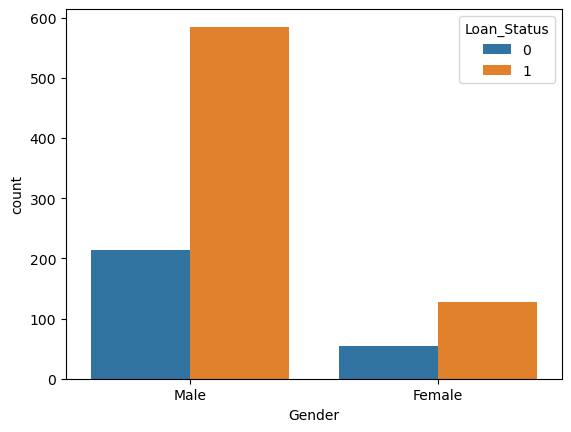

In [33]:
sns.countplot(data=df_final,x='Gender',hue='Loan_Status')

<Axes: xlabel='Married', ylabel='count'>

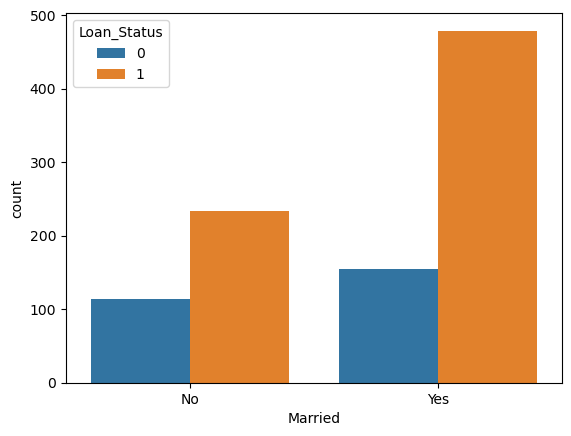

In [34]:
sns.countplot(data=df_final,x='Married',hue='Loan_Status')

<Axes: xlabel='Dependents', ylabel='count'>

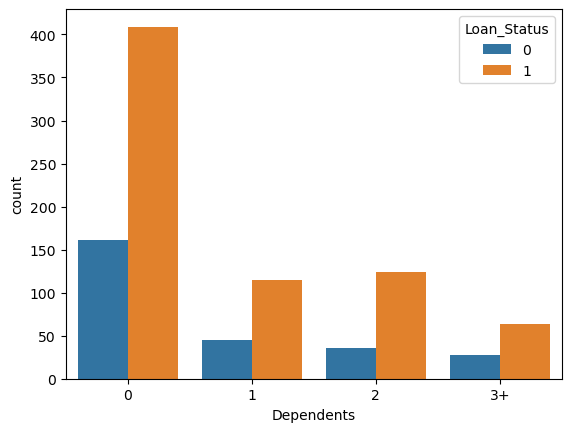

In [35]:
sns.countplot(data=df_final,x='Dependents',hue='Loan_Status')

<Axes: xlabel='Education', ylabel='count'>

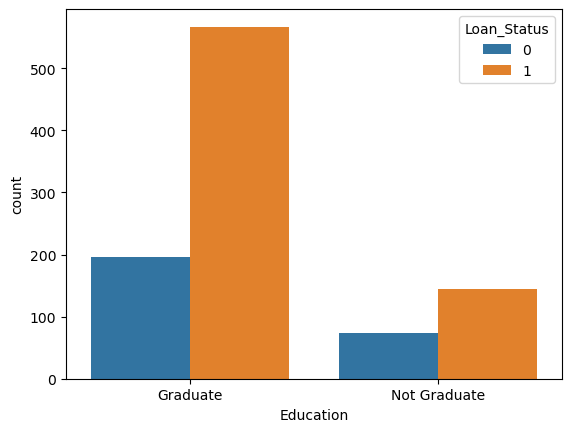

In [36]:
sns.countplot(data=df_final,x='Education',hue='Loan_Status')

<Axes: xlabel='Self_Employed', ylabel='count'>

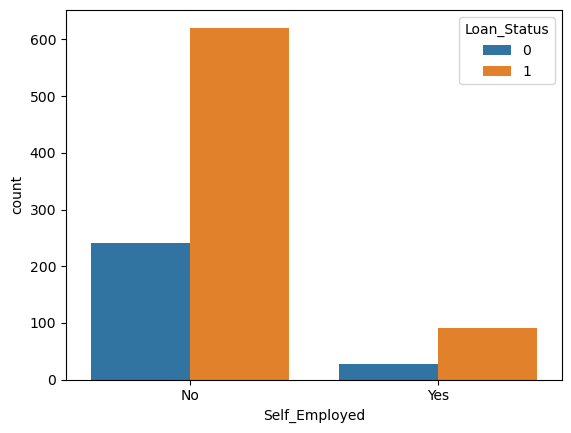

In [37]:
sns.countplot(data=df_final,x='Self_Employed',hue='Loan_Status')

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

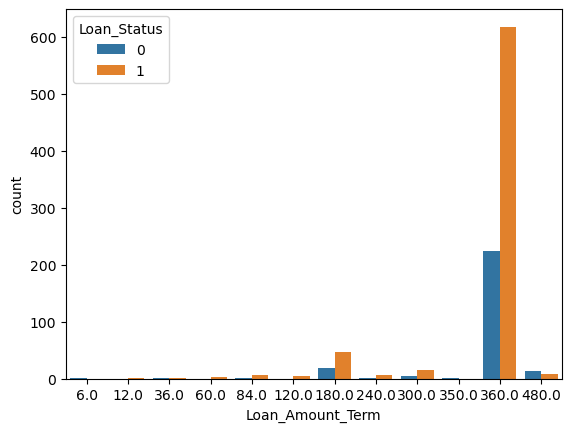

In [38]:
sns.countplot(data=df_final,x='Loan_Amount_Term',hue='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

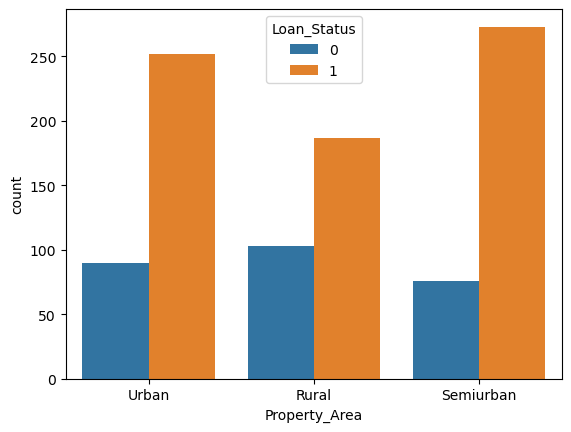

In [39]:
sns.countplot(data=df_final,x='Property_Area',hue='Loan_Status')

<Axes: xlabel='Credit_History', ylabel='count'>

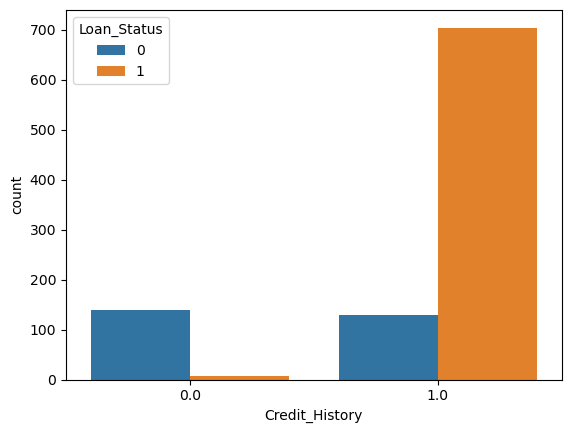

In [40]:
sns.countplot(data=df_final,x='Credit_History',hue='Loan_Status')

C:\Users\rahul\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


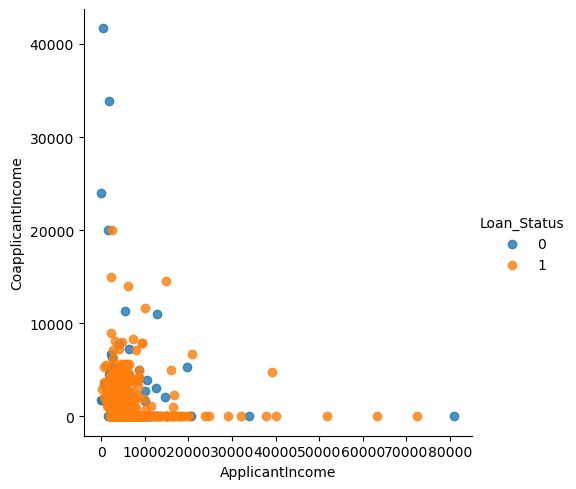

In [42]:
sns.lmplot(data=df_final, x='ApplicantIncome', y='CoapplicantIncome', hue='Loan_Status',fit_reg=False)

C:\Users\rahul\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


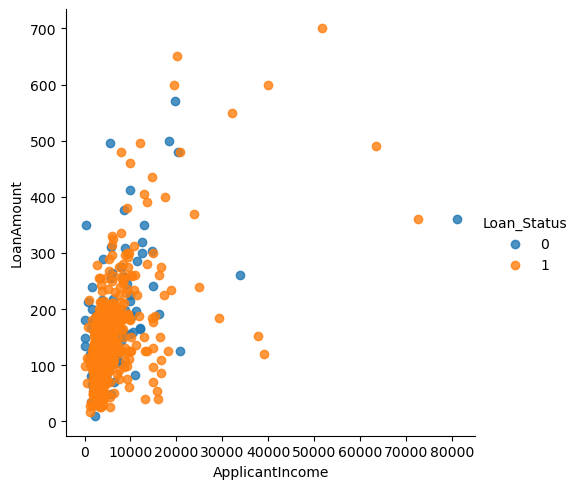

In [44]:
sns.lmplot(data=df_final, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status',fit_reg=False)

C:\Users\rahul\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


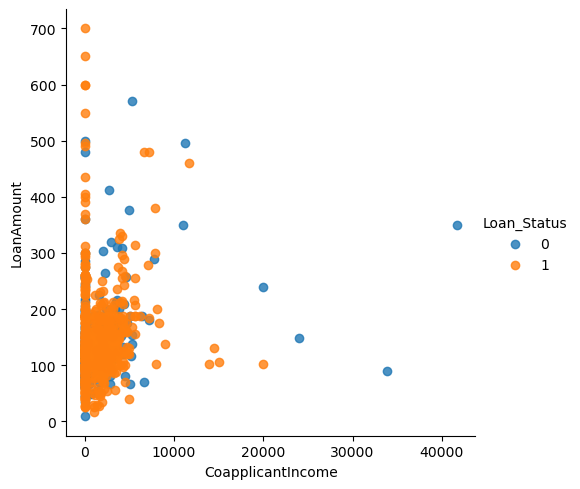

In [45]:
sns.lmplot(data=df_final, x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status',fit_reg=False)

**Credit History is looking like a very significant feature**

In [46]:
df_final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,1
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,1
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,1
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0


**Encoding**

In [47]:
df_final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,1
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,1
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban,1
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0


In [26]:
df_final['Gender'] = df_final['Gender'].astype('category')
df_final['Gender'] = df_final['Gender'].cat.codes

In [54]:
df_final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,0,No,5849,0.0,126.0,360.0,1.0,Urban,1
1,LP001003,1,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,1,Yes,3+,1,Yes,4009,1777.0,113.0,360.0,1.0,Urban,1
977,LP002975,1,Yes,0,0,No,4158,709.0,115.0,360.0,1.0,Urban,1
978,LP002980,1,No,0,0,No,3250,1993.0,126.0,360.0,1.0,Semiurban,1
979,LP002986,1,Yes,0,0,No,5000,2393.0,158.0,360.0,1.0,Rural,0


In [27]:
df_final['Education'] = df_final['Education'].astype('category')
df_final['Education'] = df_final['Education'].cat.codes

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int8   
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    int8   
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    int64  
dtypes: float64(4), int64(2), int8(2), object(5)
memory usage: 86.3+ KB


In [29]:
df_final['Married'] = df_final['Married'].astype('category')
df_final['Married'] = df_final['Married'].cat.codes

In [30]:
df_final['Dependents'] = df_final['Dependents'].astype('category')
df_final['Dependents'] = df_final['Dependents'].cat.codes

In [31]:
df_final['Property_Area'] = df_final['Property_Area'].astype('category')
df_final['Property_Area'] = df_final['Property_Area'].cat.codes

In [32]:
df_final['Self_Employed'] = df_final['Self_Employed'].astype('category')
df_final['Self_Employed'] = df_final['Self_Employed'].cat.codes

In [33]:
df_final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2,1
977,LP002975,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2,1
978,LP002980,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1,1
979,LP002986,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0,0


**Splitting the data into Train and Test and X and Y**

In [34]:
x = df_final.iloc[:,1:12].values

In [35]:
y = df_final.iloc[:,-1].values

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=123)

In [37]:
len(x)

981

In [38]:
len(x_train)

686

In [39]:
len(x_test)

295

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(penalty='l1',solver='liblinear',C=0.1)
logmodel.fit(x_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

**L1 - Weight vector is a sparser vector - There will be more 0's**

In [78]:
logmodel.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.27378562e-07,
        -6.46336624e-05, -9.27581843e-04, -4.12239659e-03,
         3.23122588e+00,  5.92449818e-02]])

In [71]:
df_final

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,126.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2,1
977,LP002975,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2,1
978,LP002980,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1,1
979,LP002986,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0,0


**K-Fold Cross Validation Technique - For fine tuning the hyper parameter**

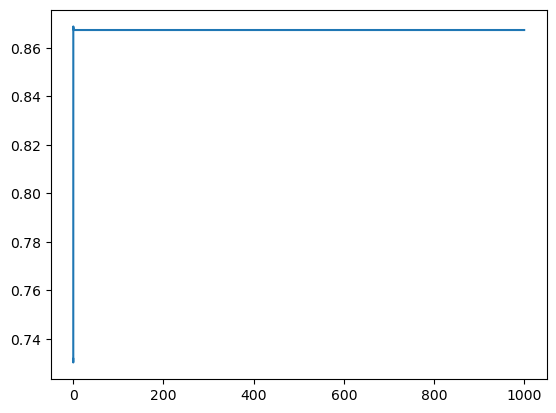

In [75]:
from sklearn.model_selection import cross_val_score
lambdainv = [0.001,0.01,0.1,1,10,100,1000]
cv_scores = []
for i in lambdainv:
    logmodel = LogisticRegression(penalty='l1',  solver='liblinear', C = i)
    scores = cross_val_score(logmodel,x_train,y_train,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
    
plt.plot(lambdainv,cv_scores)

In [76]:
cv_scores

[0.7317782714482175,
 0.730318417433619,
 0.8688247117317254,
 0.8673648577171269,
 0.8673648577171269,
 0.8673648577171269,
 0.8673648577171269]

In [81]:
y_pred = logmodel.predict(x_test)

In [80]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

**Accuracy Score**

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8406779661016949

**Confusion Matrix**

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 42,  43],
       [  4, 206]], dtype=int64)

In [90]:
sum(y_pred)

249

In [93]:
248/295

0.8406779661016949

In [95]:
df_new = pd.read_csv('Python_Module_Day_15.3_Credit_Risk_Test_data.csv')

In [114]:
df_new.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [100]:
df_new.groupby('Gender').size()
df_new['Gender'] = df_new['Gender'].fillna('Male')

In [103]:
df_new.groupby('Dependents').size()
df_new['Dependents'] = df_new['Dependents'].fillna('0')

In [106]:
df_new.groupby('Self_Employed').size()
df_new['Self_Employed'] = df_new['Self_Employed'].fillna('No')

In [109]:
df_new.groupby('Loan_Amount_Term').size()
df_new['Loan_Amount_Term'] = df_new['Loan_Amount_Term'].fillna(360.0)

In [111]:
df_new.groupby('Credit_History').size()
df_new['Credit_History'] = df_new['Credit_History'].fillna(1.0)

In [113]:
df_new['LoanAmount'] = df_new['LoanAmount'].fillna(df_new['LoanAmount'].median())

In [122]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,Urban
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,Rural


In [117]:
df_new['Married'] = df_new['Married'].astype('category')
df_new['Married'] = df_new['Married'].cat.codes

In [118]:
df_new['Gender'] = df_new['Gender'].astype('category')
df_new['Gender'] = df_new['Gender'].cat.codes

In [119]:
df_new['Dependents'] = df_new['Dependents'].astype('category')
df_new['Dependents'] = df_new['Dependents'].cat.codes

In [120]:
df_new['Education'] = df_new['Education'].astype('category')
df_new['Education'] = df_new['Education'].cat.codes

In [121]:
df_new['Self_Employed'] = df_new['Self_Employed'].astype('category')
df_new['Self_Employed'] = df_new['Self_Employed'].cat.codes

In [123]:
df_new['Property_Area'] = df_new['Property_Area'].astype('category')
df_new['Property_Area'] = df_new['Property_Area'].cat.codes

In [128]:
x_new = df_new.iloc[:,1:12].values

In [129]:
logmodel.predict(x_new)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [130]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [132]:
df_final_new = pd.read_csv('Python_Module_Day_15.3_Credit_Risk_Test_data.csv')

In [136]:
df_final_new = pd.concat([df_final_new, pd.DataFrame(logmodel.predict(x_new))],axis=1)

In [138]:
df_final_new.rename(columns={0:'Loan_Status'},inplace=True)

In [142]:
df_final_new['Loan_Status'] = df_final_new['Loan_Status'].map({1:'Eligible for Loan', 0:'Not Eligible for Loan'})

In [144]:
df_final_new.to_csv('Final_Prediction.csv')

# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB(var_smoothing=10)
nb_model.fit(x_train,y_train)

GaussianNB(var_smoothing=10)

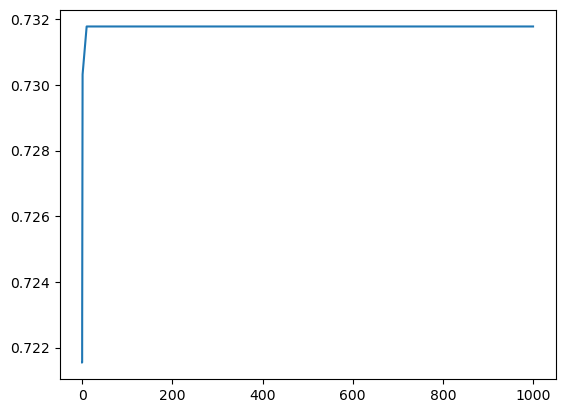

In [41]:
from sklearn.model_selection import cross_val_score
var_smoothing = [0.001,0.01,0.1,1,10,100,1000]
cv_scores = []
for i in var_smoothing:
    nb_model = GaussianNB(var_smoothing=i)
    scores = cross_val_score(nb_model,x_train,y_train,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
    
plt.plot(var_smoothing,cv_scores)

In [42]:
cv_scores

[0.7215487146937479,
 0.7215487146937479,
 0.7229874114037871,
 0.730318417433619,
 0.7317782714482175,
 0.7317782714482175,
 0.7317782714482175]

In [46]:
y_pred = nb_model.predict(x_test)

In [48]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [45]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.711864406779661

# K-Nearest Neighbour

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

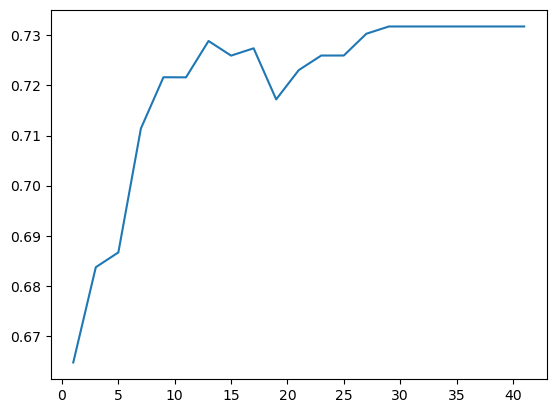

In [51]:
from sklearn.model_selection import cross_val_score
neighbours = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41]
cv_scores = []
for i in neighbours:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn_model,x_train,y_train,cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
    
plt.plot(neighbours,cv_scores)

In [55]:
knn_model.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)